In [1]:
import jax
import jax.numpy as jnp
import tensorflow_probability.substrates.jax as tfp

tfd = tfp.distributions

In [2]:
@jax.jit
@jax.vmap
def get_pokie_statistic(n, k, N):
  return jnp.where(k == 1, (n + 1) / (N + 2), (N - n + 1) / (N + 2))

@jax.vmap
@jax.jit
def get_n_k_values(key, lambda_k, lambda_n, N):
  key1, key2 = jax.random.split(key)
  k = tfd.Bernoulli(probs=lambda_k).sample(1, key1)
  n = tfd.Binomial(total_count=N, probs=lambda_n).sample(1, key2)
  return n, k

def get_pokie_value(lambda_k, lambda_n, N, key):
  n, k = get_n_k_values(
      jax.random.split(key, len(lambda_k)),
      lambda_k,
      lambda_n,
      N*jnp.ones([len(lambda_k),1])
  )
  pokie_stats = get_pokie_statistic(
      n,
      k,
      N*jnp.ones([len(lambda_k),1])
  )
  return jnp.mean(pokie_stats)

# first test assuming uniform distribution

In [3]:
# First test: lambda_n = lambda_k
lambda_k_dist = tfd.Uniform(low=0.0, high=1.0)
lambda_n_dist = tfd.Uniform(low=0.0, high=1.0)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(10))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(10))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.6672864


In [4]:
# 2/3 this is what I got from the proof when we assume uniform distribution

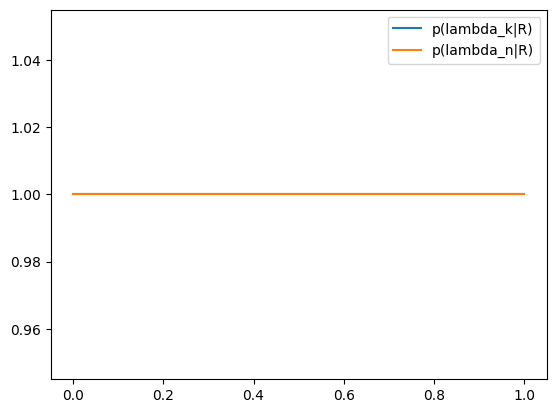

In [5]:
import matplotlib.pyplot as plt

x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [6]:
# First test: lambda_n != lambda_k and p(lambda_n|R) = Unif
# i.e. there is no ball where lambda_n equals lambda_k (worst case)

lambda_k_dist = tfd.Uniform(low=0.0, high=1.0)
lambda_n_dist = tfd.Uniform(low=0.0, high=1.0)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(10))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.49980396


In [ ]:
# again, this is the lower bound we have when we assum unif distribution

In [7]:
# This is true as long as long as lmabda_n|R is Uniform even if lambda_k|R is not

lambda_k_dist = tfd.Beta(1,2)
lambda_n_dist = tfd.Uniform(low=0.0, high=1.0)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(10))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.49948576


In [ ]:
# (I also observe this is the deriavtion of the proof)

# second test, not uniform  

In [6]:
# Second test: lambda_n = lambda_k but p(lambda|R) != U[0,1]
lambda_k_dist = tfd.Beta(2, 10)
lambda_n_dist = tfd.Beta(2, 10)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(10))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(10))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.7429237


In [7]:
# not 2/3 anymore when it is not a unif dist

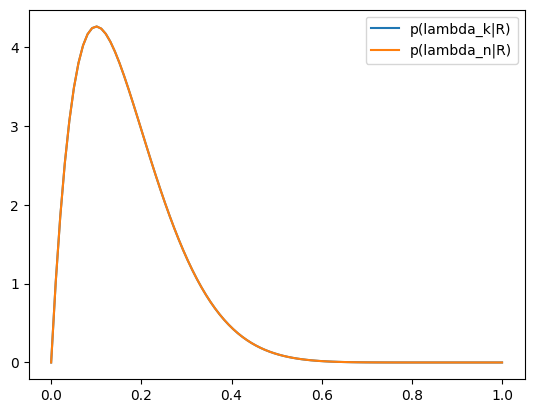

In [8]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [10]:
# if lambda_n != lambda_k and p(lambda_n|R)!=p(lambda_k) and p(lambda_n|R) != U[0,1], pokie > than when posteriors are equal
lambda_k_dist = tfd.Beta(2, 60)
lambda_n_dist = tfd.Beta(2, 10)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(10))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.81201106


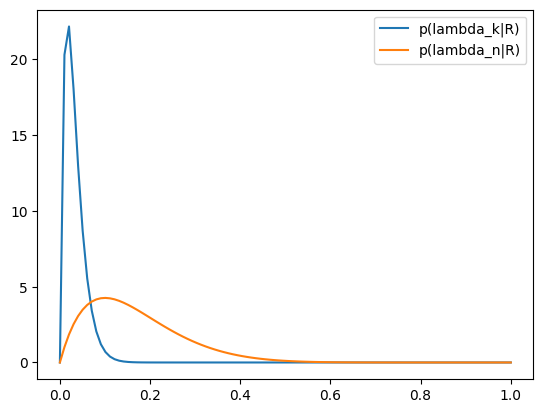

In [11]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

# third test (same but with different distributions)

In [8]:
# Second test: lambda_n = lambda_k but p(lambda|R) != U[0,1]
lambda_k_dist = tfd.Beta(2, 5)
lambda_n_dist = tfd.Beta(2, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(10))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(10))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.64272916


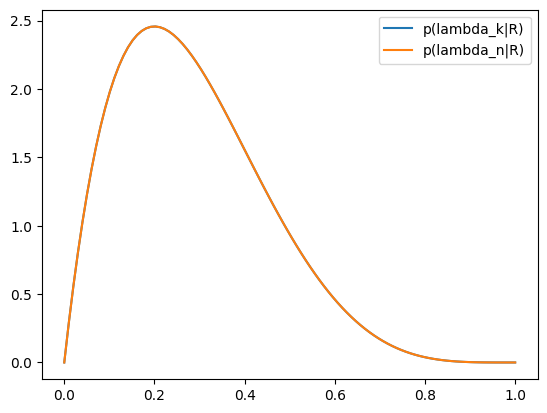

In [25]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [13]:
lambda_k_dist = tfd.Beta(2, 60)
lambda_n_dist = tfd.Beta(2, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(10))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.7005705


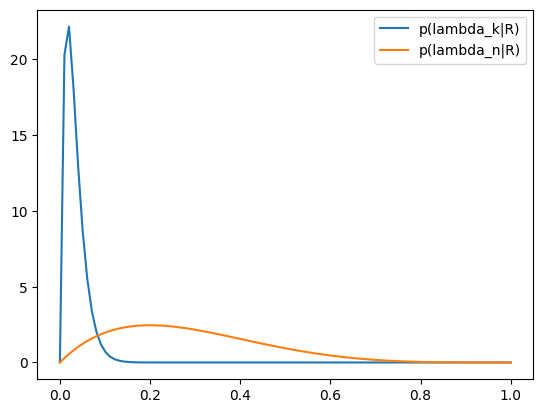

In [14]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

# fourth test

In [17]:
lambda_k_dist = tfd.Beta(10, 5)
lambda_n_dist = tfd.Beta(10, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.583251


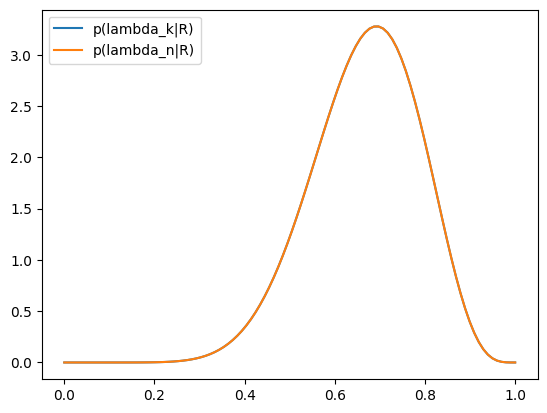

In [18]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [26]:
lambda_k_dist = tfd.Beta(10, 60)
lambda_n_dist = tfd.Beta(10, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.38581014


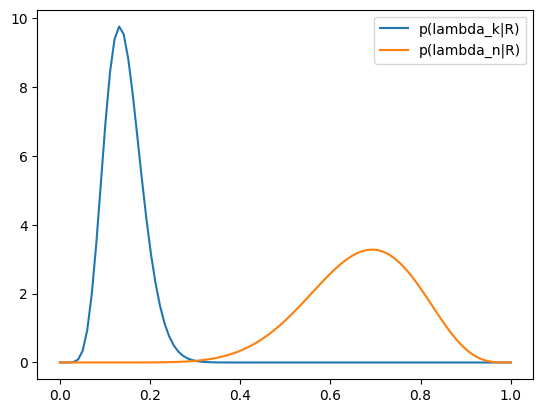

In [27]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [21]:
lambda_k_dist = tfd.Beta(2, 5)
lambda_n_dist = tfd.Beta(10, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.46007207


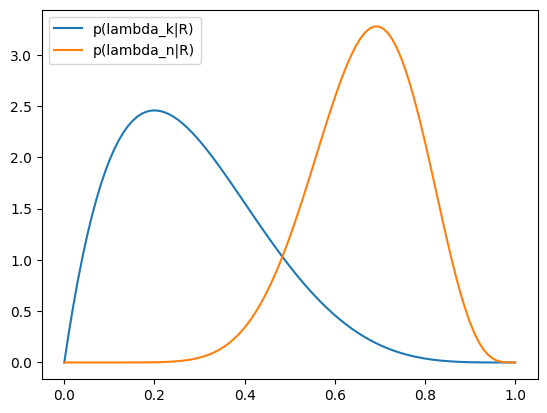

In [22]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [36]:
lambda_k_dist = tfd.Beta(50, 5)
lambda_n_dist = tfd.Beta(10, 5)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.64335275


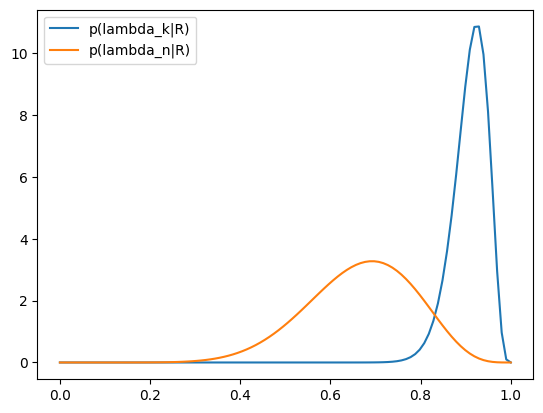

In [37]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

# fith test

In [40]:
lambda_k_dist = tfd.Beta(2, 2)
lambda_n_dist = tfd.Beta(2, 2)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.60026306


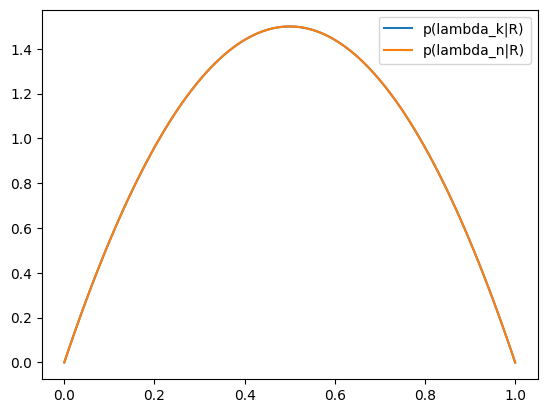

In [41]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [44]:
lambda_k_dist = tfd.Beta(50, 2)
lambda_n_dist = tfd.Beta(2, 2)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.50770885


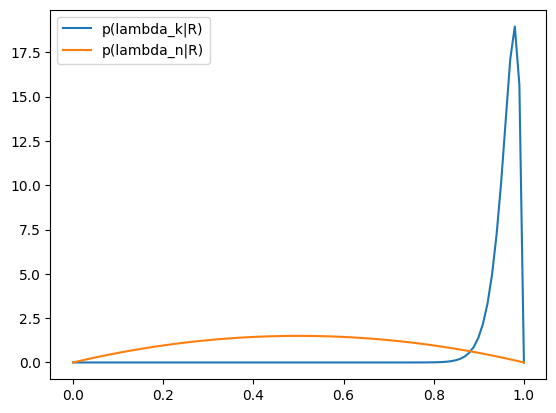

In [45]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [46]:
lambda_k_dist = tfd.Beta(2, 50)
lambda_n_dist = tfd.Beta(2, 2)

lambda_k = lambda_k_dist.sample(100_000, jax.random.PRNGKey(1))
lambda_n = lambda_n_dist.sample(100_000, jax.random.PRNGKey(1))
N = 100_000

print(get_pokie_value(lambda_k, lambda_n, N, jax.random.PRNGKey(0)))

0.50756156


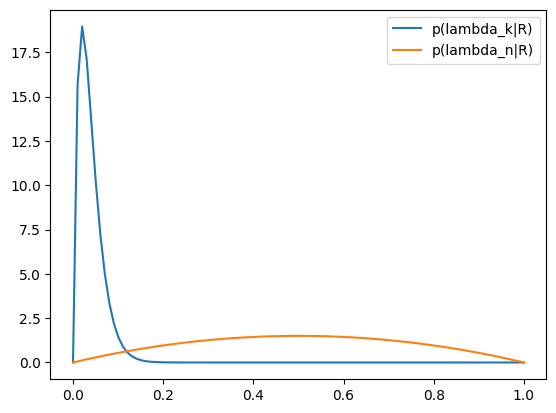

In [47]:
x = jnp.linspace(0, 1, 100)
plt.plot(x,lambda_k_dist.prob(x), label='p(lambda_k|R)')
plt.plot(x,lambda_n_dist.prob(x), label='p(lambda_n|R)')
plt.legend()
plt.show()

In [ ]:
# if p(lambda|R) symetric then ranking is okay